## Model Building: Part 2

After creating new features, we can continue the model-building process. So we will start with the decision tree model and then move over to more complex models like RandomForest and XGBoost.

We will build the following models in this section.

* Decision Tree
* Random Forest
* XGBoost

In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [12]:
train=pd.read_csv("train_FE2.csv") 
test=pd.read_csv("test_FE2.csv")

In [13]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [14]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

### Decision Tree
A decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on the most significant splitter/differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [26]:
# Let’s fit the decision tree model with 5 folds of cross-validation.
i=1 
mean_validation_score=0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index] 
    model = DecisionTreeClassifier(random_state=1) 
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score) 
    i+=1 
    mean_validation_score+=score
print("mean validation accuracy",mean_validation_score/5)
pred_test = model.predict(test) 


n1 of kfold 5
accuracy_score 0.7317073170731707
n2 of kfold 5
accuracy_score 0.7154471544715447
n3 of kfold 5
accuracy_score 0.7479674796747967
n4 of kfold 5
accuracy_score 0.7317073170731707
n5 of kfold 5
accuracy_score 0.6475409836065574
mean validation accuracy 0.7148740503798481


In [19]:
pd.DataFrame(pred_test).value_counts()

1    248
0    119
dtype: int64

By submitting We got an accuracy of 0.69 which is much lesser than the accuracy of the Logistic Regression model.

So let’s build another model, i.e. Random Forest, a tree-based ensemble algorithm and try to improve our model by improving the accuracy.

### Random Forest
* RandomForest is a tree-based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.
* For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.
* The final prediction can be a function of all the predictions made by the individual learners.
* In the case of a regression problem, the final prediction can be the mean of all the predictions.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [25]:
i=1 
mean_validation_score=0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index] 
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score) 
    i+=1
    mean_validation_score+=score
print("mean validation accuracy",mean_validation_score/5)
pred_test = model.predict(test)

n1 of kfold 5
accuracy_score 0.8211382113821138
n2 of kfold 5
accuracy_score 0.7967479674796748
n3 of kfold 5
accuracy_score 0.7886178861788617
n4 of kfold 5
accuracy_score 0.7967479674796748
n5 of kfold 5
accuracy_score 0.7622950819672131
mean validation accuracy 0.7931094228975076


In [27]:
pd.DataFrame(pred_test).value_counts()

1    248
0    119
dtype: int64

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyperparameters. Grid-search is a way to select the best of a family of hyperparameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in the random forest model.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [31]:
## Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 
                    'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
# Fit the grid search model 
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [32]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=61, random_state=1)

So, the optimized value for the max_depth variable is 7 and for n_estimator is 61. Now let’s build the model using these optimized values.

In [60]:
i=1 
mean_validation_score=0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index] 
    model = RandomForestClassifier(random_state=1, max_depth=7, n_estimators=61)     
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score) 
    i+=1 
    mean_validation_score+=score
print("mean validation accuracy",mean_validation_score/5)

pred_test = model.predict(test) 
pred2 =  model.predict_proba(test)
#pred2                         

n1 of kfold 5
accuracy_score 0.8211382113821138
n2 of kfold 5
accuracy_score 0.8455284552845529
n3 of kfold 5
accuracy_score 0.7886178861788617
n4 of kfold 5
accuracy_score 0.7886178861788617
n5 of kfold 5
accuracy_score 0.7786885245901639
mean validation accuracy 0.8045181927229107


We got an accuracy of 0.7638 from the random forest model on the leaderboard.

In [39]:
pd.DataFrame(pred_test).value_counts()

1    304
0     63
dtype: int64

Let us find the feature importance now, i.e. which features are most important for this problem. We will use the feature_importances_ attribute of sklearn to do so.

<AxesSubplot:>

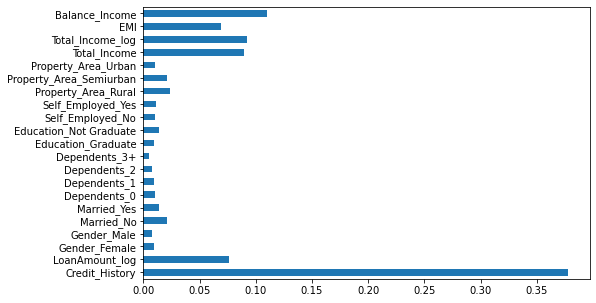

In [42]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(8,5))

We can see that Credit_History is the most important feature followed by Balance Income, Total Income, and EMI. So, feature engineering helped us in predicting our target variable.

## XGBOOST
XGBoost is a fast and efficient algorithm and has been used by the winners of many data science competitions. It’s a boosting algorithm and you may refer to the below article to know more about boosting:

XGBoost works only with numeric variables and we have already replaced the categorical variables with numeric variables. Let’s have a look at the parameters that we are going to use in our model.

* n_estimator: This specifies the number of trees for the model.
* max_depth: We can specify the maximum depth of a tree using this parameter.

In [44]:
from xgboost import XGBClassifier

In [61]:
i=1 
mean_validation_score=0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index] 
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score) 
    i+=1 
    mean_validation_score+=score
print("mean validation accuracy",mean_validation_score/5)


n1 of kfold 5
accuracy_score 0.7804878048780488
n2 of kfold 5
accuracy_score 0.7886178861788617
n3 of kfold 5
accuracy_score 0.7642276422764228
n4 of kfold 5
accuracy_score 0.7804878048780488
n5 of kfold 5
accuracy_score 0.7622950819672131
mean validation accuracy 0.7752232440357191


In [62]:
pred_test = model.predict(test)
pred2 =  model.predict_proba(test)

In [63]:
pd.DataFrame(pred_test).value_counts()

1    291
0     76
dtype: int64

By submitting We got an accuracy of 0.73611 with this model  on the leader board


## Conclusion
There are still quite a many things that can be tried to improve our models’ predictions. We create and add more variables, try different models with a different subset of features and/or rows, etc. Some of the ideas are listed below

* We can train the XGBoost model using grid search to optimize its hyperparameters and improve its accuracy.
* We can combine the applicants with 1,2,3 or more dependents and make a new feature as discussed in the EDA part.
* We can also make independent vs independent variable visualizations to discover some more patterns.
* We can also arrive at the EMI using a better formula which may include interest rates as well.
* Wecan even try ensemble modeling (a combination of different models). Toread more about ensemble techniques you can refer to these articles

## Keytakeaways
1. understand the real problem
2. Exploratory Data Analysis (EDA) and Pre-Processing
3. understand the concept of univariate, bivariate
4. how to find outlier points from data
5. how to evaluate model using metrics
6. we also learn a few techniques of feature engineering
7. Model building with few algorithms

